#Getting dataset from Kaggle

In [0]:
from google.colab import files
files.upload()

In [0]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle

In [0]:
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json

In [0]:
!kaggle competitions download -c titanic

In [0]:
!ls

#Importing dataset and basic manipulation

Importing the libraries

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Importing the dataset

In [0]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [208]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [209]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


Removing unwanted columns

In [0]:
train=train.drop(columns='PassengerId',axis=1)

In [211]:
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [212]:
test=test.drop(columns='PassengerId',axis=1)
test

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...
413,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [0]:
ntrain=train.shape[0]
ntest=test.shape[0]
y=train['Survived']

In [214]:
ntrain

891

In [215]:
ntest

418

In [216]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [217]:
train=train.drop(columns='Survived',axis=1)
train

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
886,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Combining the training and test file for data preprocessing

In [218]:
all_data=pd.concat([train,test],ignore_index=True)
all_data

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
1304,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [219]:
all_data['Name'][1308]

'Peter, Master. Michael J'

 We are dropping the columns Name and Ticket since they do not provide useful information about the accident or the chances of survival of the people on the ship. 

In [220]:
all_data=all_data.drop(columns=['Name','Ticket'])
all_data

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,22.0,1,0,7.2500,NaN,S
1,1,female,38.0,1,0,71.2833,C85,C
2,3,female,26.0,0,0,7.9250,NaN,S
3,1,female,35.0,1,0,53.1000,C123,S
4,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...
1304,3,male,NaN,0,0,8.0500,NaN,S
1305,1,female,39.0,0,0,108.9000,C105,C
1306,3,male,38.5,0,0,7.2500,NaN,S
1307,3,male,NaN,0,0,8.0500,NaN,S


#Exploratory Data Analysis(Columnwise)

 ### Passenger Class

Passenger class might be a very useful category in predicting the chances of survival of a passenger.Passenger class might be representative of how the people were placed on the ship or how these different classes of people were seperated on the ship

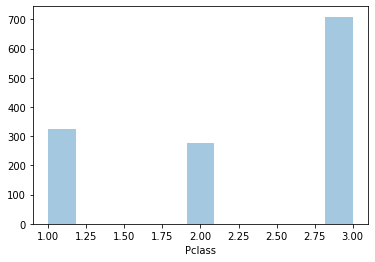

In [221]:
import seaborn as sns
sns.distplot(all_data['Pclass'],kde=False,rug=False)

According to the plot , most of the passengers were of the third class .

In [22]:
original=pd.read_csv('train.csv')
pclass_data=original[['Pclass','Survived']]
pclass_data

,Pclass,Survived
0,3,0
1,1,1
2,3,1
3,1,1
4,3,0
...,...,...
886,2,0
887,1,1
888,3,0
889,1,1


We can see which class has the highest survival ratio 


In [0]:
# getting total number of passengers in each class
p_class1_data=pclass_data[pclass_data['Pclass']==1]
p_class2_data=pclass_data[pclass_data['Pclass']==2]
p_class3_data=pclass_data[pclass_data['Pclass']==3]

#getting total number of survivors in each class
p_class1_survived=p_class1_data[p_class1_data['Survived']==1]
p_class2_survived=p_class2_data[p_class2_data['Survived']==1]
p_class3_survived=p_class3_data[p_class3_data['Survived']==1]

Calculating the survival ratios for each class

In [0]:
class1_survival_ratio=p_class1_survived.shape[0]/p_class1_data.shape[0]
class2_survival_ratio=p_class2_survived.shape[0]/p_class2_data.shape[0]
class3_survival_ratio=p_class3_survived.shape[0]/p_class3_data.shape[0]

In [27]:
class1_survival_ratio

0.6296296296296297

In [28]:
class2_survival_ratio

0.47282608695652173

In [29]:
class3_survival_ratio

0.24236252545824846

As per the data, most of the third class passengers died and only few survived.Among the higher class most of the first class passengers survived (60%) and almost half of the second class passengers survived (47%)

Calculating chances of survival of a person from each of the class

In [0]:
#chances of survival for a person in first class
chances1=p_class1_survived.shape[0]/(p_class1_data.shape[0]+p_class2_data.shape[0]+p_class3_data.shape[0])

#chances of survival for a person in second class
chances2=p_class2_survived.shape[0]/(p_class1_data.shape[0]+p_class2_data.shape[0]+p_class3_data.shape[0])

#chances of survival for a person in third class
chances3=p_class3_survived.shape[0]/(p_class1_data.shape[0]+p_class2_data.shape[0]+p_class3_data.shape[0])

In [31]:
chances1 # person belonging to class 1

0.1526374859708193

In [32]:
chances2 # person belonging to class 2

0.09764309764309764

In [33]:
chances3 # person belonging to class 3

0.1335578002244669

The above numbers show the chances of a person belonging to either of the classes surviving

### Sex

We can see whether the gender of a person had something to do with their chances of survival .

(array([843.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 466.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

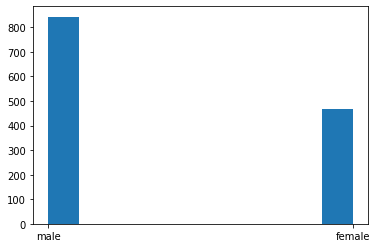

In [37]:
plt.hist(all_data['Sex'])

In [39]:
original=pd.read_csv('train.csv')
gender_data=original[['Sex','Survived']]
gender_data

,Sex,Survived
0,male,0
1,female,1
2,female,1
3,female,1
4,male,0
...,...,...
886,male,0
887,female,1
888,female,0
889,male,1


We can see which gender has the highest survival ratio 


In [0]:
# getting total number of passengers in each gender
male_data=gender_data[gender_data['Sex']=='male']
female_data=gender_data[gender_data['Sex']=='female']

#getting total number of survivors in each gender
male_survived=male_data[male_data['Survived']==1]
female_survived=female_data[female_data['Survived']==1]

Calculating the survival ratios for each class

In [0]:
male_survival_ratio=male_survived.shape[0]/male_data.shape[0]
female_survival_ratio=female_survived.shape[0]/female_data.shape[0]

In [42]:
female_survival_ratio

0.7420382165605095

In [43]:
male_survival_ratio

0.18890814558058924

As per the data, most of the male passengers died and only few survived.Among the females , about 74% survived.

Calculating chances of survival of a person from each of the sex

In [0]:
#chances of survival for a male
chances_male=male_survived.shape[0]/(male_data.shape[0]+female_data.shape[0])

#chances of survival for a female
chances_female=female_survived.shape[0]/(male_data.shape[0]+female_data.shape[0])


In [50]:
chances_male 

0.122334455667789

In [51]:
chances_female 

0.2615039281705948

The above numbers show the chances of a person belonging to either of the sex surviving.From the data females have a 26% chance of surviving while males have 12% chance of survival.We can conclude that females had a higher chance of survival on the titanic

###Fare

Let's see a distribution about the fares of the on the ship.The fare of a person might be representative of the services opted by the person.So this might be an indicator of what the person was doing during the accident . 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


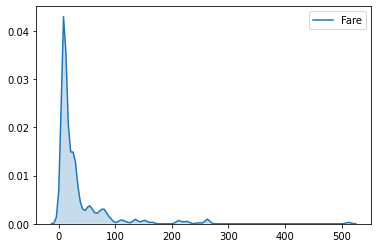

In [0]:
import seaborn as sns
sns.kdeplot(all_data['Fare'],shade=True)

###SibSp and Parch

The following distributions show the number of siblings,parents or realatives each person had. The numeber of family members might affect the chances of survival of a person.

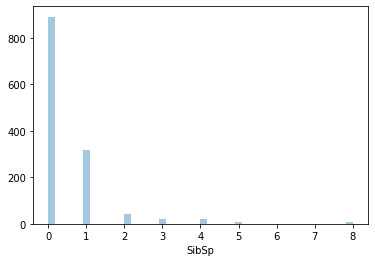

In [0]:
sns.distplot(all_data['SibSp'],kde=False,rug=False)

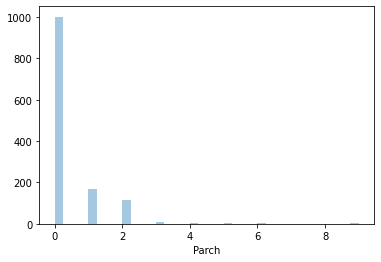

In [0]:
sns.distplot(all_data['Parch'],kde=False,rug=False)

As we can see most of the people were travelling alone and did not have any relatives .

We can also relate chances of survival with the number of family members each person had.

In [56]:
family_data=original[['Survived','SibSp','Parch']]
family_data['Family_Size']=family_data['SibSp']+family_data['Parch']
family_data

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Survived,SibSp,Parch,Family_Size
0,0,1,0,1
1,1,1,0,1
2,1,0,0,0
3,1,1,0,1
4,0,0,0,0
...,...,...,...,...
886,0,0,0,0
887,1,0,0,0
888,0,1,2,3
889,1,0,0,0


In [57]:
family_data=family_data.drop(columns=['SibSp','Parch'],axis=1)
family_data

,Survived,Family_Size
0,0,1
1,1,1
2,1,0
3,1,1
4,0,0
...,...,...
886,0,0
887,1,0
888,0,3
889,1,0


Now we can see how having a family would affect the chances of a person's survival

In [63]:
yes_family_data=family_data[family_data['Family_Size']>0]
yes_family_data

,Survived,Family_Size
0,0,1
1,1,1
3,1,1
7,0,4
8,1,2
...,...,...
874,1,1
879,1,1
880,1,1
885,0,5


In [64]:
no_family_data=family_data[family_data['Family_Size']==0]
no_family_data

,Survived,Family_Size
2,1,0
4,0,0
5,0,0
6,0,0
11,1,0
...,...,...
884,0,0
886,0,0
887,1,0
889,1,0


Now we can calculate the chances of survival of people having families and chances of survival of people having no families.

In [0]:
yes_family_survived=yes_family_data[yes_family_data['Survived']==1]
no_family_survived=no_family_data[no_family_data['Survived']==1]

Chances of survival of people with families

In [68]:
yes_family_survived

,Survived,Family_Size
1,1,1
3,1,1
8,1,2
9,1,1
10,1,2
...,...,...
869,1,2
871,1,2
874,1,1
879,1,1


In [69]:
no_family_survived

,Survived,Family_Size
2,1,0
11,1,0
15,1,0
17,1,0
19,1,0
...,...,...
862,1,0
865,1,0
875,1,0
887,1,0


In [70]:
chances_yes_family=yes_family_survived.shape[0]/family_data.shape[0]
chances_yes_family

0.20089786756453423

Chances of survival of people without  a family

In [72]:
chances_no_family=no_family_survived.shape[0]/family_data.shape[0]
chances_no_family

0.1829405162738496

As per the data , having a family gives a person higher chances of survival but by a margin . People having a family have 20% survival chances while people having no families have 18% survival chances.

###Age 

Age might severly affect the chances of survival ,since older people are less agile , and weaker than the young ones.

In [77]:
age_data=original[['Survived','Age']]
age_data

,Survived,Age
0,0,22.0
1,1,38.0
2,1,26.0
3,1,35.0
4,0,35.0
...,...,...
886,0,27.0
887,1,19.0
888,0,NaN
889,1,26.0


Dealing with missing values

In [88]:
sum_age=age_data.sum(axis = 0, skipna = True)['Age']
number_of_people=age_data[age_data['Age']>=0].shape[0]
average=sum_age/number_of_people
age_data["Age"].fillna(average, inplace = True) 

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


Now let's visualise the distribution of age

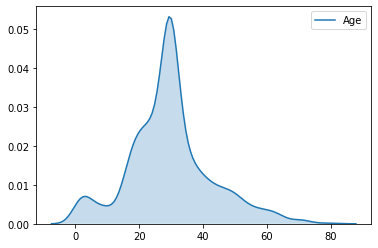

In [91]:
import seaborn as sns
sns.kdeplot(age_data['Age'],shade=True)

In [92]:
age_survived=age_data[age_data['Survived']==1]
age_survived

,Survived,Age
1,1,38.0
2,1,26.0
3,1,35.0
8,1,27.0
9,1,14.0
...,...,...
875,1,15.0
879,1,56.0
880,1,25.0
887,1,19.0


Now we visualise the distribution of age of those people who survived

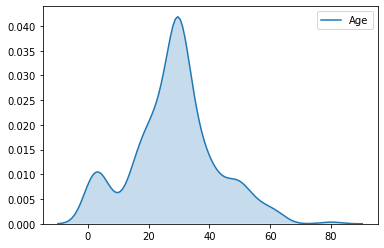

In [93]:
sns.kdeplot(age_survived['Age'],shade=True)

(array([ 36.,  19.,  63., 117.,  52.,  24.,  21.,   9.,   0.,   1.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <a list of 10 Patch objects>)

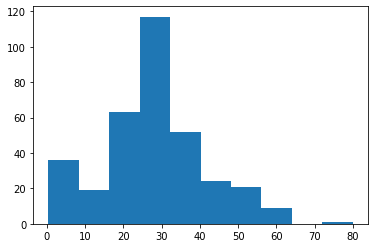

In [94]:
plt.hist(age_survived['Age'])

###Cabin

Can having a cabin change the chances of survival?

In [95]:
cabin_data=original[['Survived','Cabin']]
cabin_data

,Survived,Cabin
0,0,NaN
1,1,C85
2,1,NaN
3,1,C123
4,0,NaN
...,...,...
886,0,NaN
887,1,B42
888,0,NaN
889,1,C148


In [99]:
cabin_yes=cabin_data[cabin_data.Cabin.notnull()]
cabin_survived=cabin_data[cabin_data['Survived']==1]
cabin_yes_survived=cabin_yes[cabin_yes['Survived']==1]

,Survived,Cabin
1,1,C85
2,1,NaN
3,1,C123
8,1,NaN
9,1,NaN
...,...,...
875,1,NaN
879,1,C50
880,1,NaN
887,1,B42


Now chances of survival are with cabin

In [98]:
chances=cabin_yes_survived.shape[0]/cabin_data.shape[0]
chances

0.1526374859708193

Now chances of survival are without cabin

In [101]:
chances=(cabin_survived.shape[0]-cabin_yes_survived.shape[0])/cabin_data.shape[0]
chances

0.23120089786756454

The chances of survival for a person without a cabin are 23%.
The chance  of survival for a person with a cabin are 15%

###Embarked 

Does embarking place have an effect on survival?

---



In [103]:
embarked=original[['Survived','Embarked']]
embarked

,Survived,Embarked
0,0,S
1,1,C
2,1,S
3,1,S
4,0,S
...,...,...
886,0,S
887,1,S
888,0,S
889,1,C


In [105]:
embarked["Embarked"].fillna('Unknown', inplace = True) 

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


Visualising histogram for embarking place

(array([644.,   0.,   0., 168.,   0.,   0.,  77.,   0.,   0.,   2.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

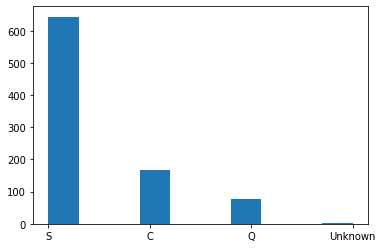

In [106]:
plt.hist(embarked['Embarked'])

Visualising place of embarking for survivors

In [108]:
embarked_survived=embarked[embarked['Survived']==1]
embarked_survived

,Survived,Embarked
1,1,C
2,1,S
3,1,S
8,1,S
9,1,C
...,...,...
875,1,C
879,1,C
880,1,S
887,1,S


(array([ 93.,   0.,   0., 217.,   0.,   0.,  30.,   0.,   0.,   2.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

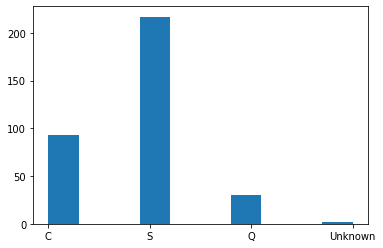

In [109]:
plt.hist(embarked_survived['Embarked'])

# Data Preprocessing

In [222]:
all_data

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,22.0,1,0,7.2500,NaN,S
1,1,female,38.0,1,0,71.2833,C85,C
2,3,female,26.0,0,0,7.9250,NaN,S
3,1,female,35.0,1,0,53.1000,C123,S
4,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...
1304,3,male,NaN,0,0,8.0500,NaN,S
1305,1,female,39.0,0,0,108.9000,C105,C
1306,3,male,38.5,0,0,7.2500,NaN,S
1307,3,male,NaN,0,0,8.0500,NaN,S


In [223]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    1309 non-null   int64  
 1   Sex       1309 non-null   object 
 2   Age       1046 non-null   float64
 3   SibSp     1309 non-null   int64  
 4   Parch     1309 non-null   int64  
 5   Fare      1308 non-null   float64
 6   Cabin     295 non-null    object 
 7   Embarked  1307 non-null   object 
dtypes: float64(2), int64(3), object(3)
memory usage: 81.9+ KB


###Dealing with the missing values in the dataset

Age column

In [0]:
sum_age=all_data.sum(axis = 0, skipna = True)['Age']
number_of_people=all_data[all_data['Age']>=0].shape[0]
average=sum_age/number_of_people
all_data["Age"].fillna(average, inplace = True) 

In [225]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    1309 non-null   int64  
 1   Sex       1309 non-null   object 
 2   Age       1309 non-null   float64
 3   SibSp     1309 non-null   int64  
 4   Parch     1309 non-null   int64  
 5   Fare      1308 non-null   float64
 6   Cabin     295 non-null    object 
 7   Embarked  1307 non-null   object 
dtypes: float64(2), int64(3), object(3)
memory usage: 81.9+ KB


Fare column

In [0]:
sum_fare=all_data.sum(axis = 0, skipna = True)['Fare']
number_of_people=all_data[all_data['Fare']>=0].shape[0]
average=sum_fare/number_of_people
all_data["Fare"].fillna(average, inplace = True)

In [227]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    1309 non-null   int64  
 1   Sex       1309 non-null   object 
 2   Age       1309 non-null   float64
 3   SibSp     1309 non-null   int64  
 4   Parch     1309 non-null   int64  
 5   Fare      1309 non-null   float64
 6   Cabin     295 non-null    object 
 7   Embarked  1307 non-null   object 
dtypes: float64(2), int64(3), object(3)
memory usage: 81.9+ KB


Embarked And Cabin

In [0]:
all_data["Embarked"].fillna('Unknown', inplace = True)
all_data["Cabin"].fillna('Unknown', inplace = True)

In [229]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    1309 non-null   int64  
 1   Sex       1309 non-null   object 
 2   Age       1309 non-null   float64
 3   SibSp     1309 non-null   int64  
 4   Parch     1309 non-null   int64  
 5   Fare      1309 non-null   float64
 6   Cabin     1309 non-null   object 
 7   Embarked  1309 non-null   object 
dtypes: float64(2), int64(3), object(3)
memory usage: 81.9+ KB


###Feature Engineering 

Introducing a new column family size

In [230]:
all_data['Family_Size']=all_data['SibSp']+all_data['Parch']
all_data

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Family_Size
0,3,male,22.000000,1,0,7.2500,Unknown,S,1
1,1,female,38.000000,1,0,71.2833,C85,C,1
2,3,female,26.000000,0,0,7.9250,Unknown,S,0
3,1,female,35.000000,1,0,53.1000,C123,S,1
4,3,male,35.000000,0,0,8.0500,Unknown,S,0
...,...,...,...,...,...,...,...,...,...
1304,3,male,29.881138,0,0,8.0500,Unknown,S,0
1305,1,female,39.000000,0,0,108.9000,C105,C,0
1306,3,male,38.500000,0,0,7.2500,Unknown,S,0
1307,3,male,29.881138,0,0,8.0500,Unknown,S,0


Changing values of the cabin column 

In [231]:
import re
j=0
for i in all_data['Cabin']:
  if (i!='Unknown'):
    replacement=list(i)
    all_data['Cabin'][j]=replacement[0]
  j=j+1  

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [232]:
all_data

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Family_Size
0,3,male,22.000000,1,0,7.2500,Unknown,S,1
1,1,female,38.000000,1,0,71.2833,C,C,1
2,3,female,26.000000,0,0,7.9250,Unknown,S,0
3,1,female,35.000000,1,0,53.1000,C,S,1
4,3,male,35.000000,0,0,8.0500,Unknown,S,0
...,...,...,...,...,...,...,...,...,...
1304,3,male,29.881138,0,0,8.0500,Unknown,S,0
1305,1,female,39.000000,0,0,108.9000,C,C,0
1306,3,male,38.500000,0,0,7.2500,Unknown,S,0
1307,3,male,29.881138,0,0,8.0500,Unknown,S,0


###Dummy Encoding categorical variables

In [233]:
j=0
for i in all_data['Pclass']:
  if(i==1):
    all_data['Pclass'][j]='Class 1'
  elif(i==2):
    all_data['Pclass'][j]='Class 2'
  elif(i==3):
    all_data['Pclass'][j]='Class 3'
  j=j+1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.

In [234]:
pd.get_dummies(all_data[['Pclass','Sex','Cabin','Embarked']],drop_first=True)

,Pclass_Class 2,Pclass_Class 3,Sex_male,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_Unknown,Embarked_Q,Embarked_S,Embarked_Unknown
0,0,1,1,0,0,0,0,0,0,0,1,0,1,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,1,0,1,0
3,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,0,1,1,0,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,0,1,1,0,0,0,0,0,0,0,1,0,1,0
1305,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1306,0,1,1,0,0,0,0,0,0,0,1,0,1,0
1307,0,1,1,0,0,0,0,0,0,0,1,0,1,0


In [235]:
all_data=pd.concat([all_data,pd.get_dummies(all_data[['Pclass','Sex','Cabin','Embarked']],drop_first=True)],axis=1)
all_data.drop(columns=['Pclass','Sex','Cabin','Embarked'],axis=1,inplace=True)
all_data

,Age,SibSp,Parch,Fare,Family_Size,Pclass_Class 2,Pclass_Class 3,Sex_male,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_Unknown,Embarked_Q,Embarked_S,Embarked_Unknown
0,22.000000,1,0,7.2500,1,0,1,1,0,0,0,0,0,0,0,1,0,1,0
1,38.000000,1,0,71.2833,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,26.000000,0,0,7.9250,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0
3,35.000000,1,0,53.1000,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,35.000000,0,0,8.0500,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,29.881138,0,0,8.0500,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0
1305,39.000000,0,0,108.9000,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1306,38.500000,0,0,7.2500,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0
1307,29.881138,0,0,8.0500,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0


###Splitting dataset into training set and test set

In [236]:
all_data

,Age,SibSp,Parch,Fare,Family_Size,Pclass_Class 2,Pclass_Class 3,Sex_male,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_Unknown,Embarked_Q,Embarked_S,Embarked_Unknown
0,22.000000,1,0,7.2500,1,0,1,1,0,0,0,0,0,0,0,1,0,1,0
1,38.000000,1,0,71.2833,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,26.000000,0,0,7.9250,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0
3,35.000000,1,0,53.1000,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,35.000000,0,0,8.0500,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,29.881138,0,0,8.0500,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0
1305,39.000000,0,0,108.9000,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1306,38.500000,0,0,7.2500,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0
1307,29.881138,0,0,8.0500,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0


In [0]:
X=all_data.iloc[:ntrain,:].values
X_pred=all_data.iloc[ntrain:,:].values

In [238]:
X

array([[22.        ,  1.        ,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       [38.        ,  1.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [26.        ,  0.        ,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [29.88113767,  1.        ,  2.        , ...,  0.        ,
         1.        ,  0.        ],
       [26.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [32.        ,  0.        ,  0.        , ...,  1.        ,
         0.        ,  0.        ]])

In [239]:
X_pred

array([[34.5       ,  0.        ,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       [47.        ,  1.        ,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       [62.        ,  0.        ,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [38.5       ,  0.        ,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       [29.88113767,  0.        ,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       [29.88113767,  1.        ,  1.        , ...,  0.        ,
         0.        ,  0.        ]])

In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [241]:
X_train

array([[29.88113767,  0.        ,  2.        , ...,  0.        ,
         0.        ,  0.        ],
       [31.        ,  0.        ,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       [31.        ,  1.        ,  1.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [29.88113767,  0.        ,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       [36.        ,  1.        ,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       [60.        ,  1.        ,  1.        , ...,  0.        ,
         1.        ,  0.        ]])

In [242]:
X_test

array([[29.88113767,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [29.88113767,  0.        ,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 7.        ,  4.        ,  1.        , ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [31.        ,  1.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [23.        ,  0.        ,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       [19.        ,  0.        ,  0.        , ...,  0.        ,
         1.        ,  0.        ]])

###Applying feature scaling

In [0]:
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
# scaling dummy variables
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)
X_pred=sc_X.transform(X_pred)

In [244]:
X_pred

array([[ 0.36144932, -0.46445234, -0.47741019, ...,  3.18198052,
        -1.62827579, -0.05307449],
       [ 1.31707943,  0.41270964, -0.47741019, ..., -0.31426968,
         0.61414657, -0.05307449],
       [ 2.46383555, -0.46445234, -0.47741019, ...,  3.18198052,
        -1.62827579, -0.05307449],
       ...,
       [ 0.66725096, -0.46445234, -0.47741019, ..., -0.31426968,
         0.61414657, -0.05307449],
       [ 0.00833541, -0.46445234, -0.47741019, ..., -0.31426968,
         0.61414657, -0.05307449],
       [ 0.00833541,  0.41270964,  0.74092692, ..., -0.31426968,
        -1.62827579, -0.05307449]])

#Building Machine Learning Model

Here we will use XGBoost to solve the problem

In [323]:
from xgboost import XGBClassifier
classifier=XGBClassifier(booster='gbtree',max_depth=3,learning_rate=0.1,n_estimators=200)
#n_estimators is the number of trees
classifier.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
y_pred=classifier.predict(X_test)

# Evaluating the accuracy of the model 

Using confusion matrix

In [0]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)

In [326]:
cm

array([[103,   7],
       [ 21,  48]])

Applying k-fold cross validation 

In [0]:
from sklearn.model_selection import cross_val_score
accuracies=cross_val_score(estimator=classifier,X=X_train,y=y_train,cv=10)

In [328]:
accuracies.mean()

0.8343114241001566

In [329]:
accuracies.std()

0.018247724381232937

We can apply grid search to improve the model performance

###Applying to predict the Unknown Outcomes 

In [384]:
from xgboost import XGBClassifier
classifier=XGBClassifier(booster='gbtree',max_depth=3,learning_rate=0.1,n_estimators=140)
#n_estimators is the number of trees
classifier.fit(X,y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=140, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
y_submit=classifier.predict(X_pred)

In [0]:
from sklearn.model_selection import cross_val_score
accuracies=cross_val_score(estimator=classifier,X=X,y=y,cv=10)

In [387]:
accuracies.mean()

0.8429088639200998

In [388]:
accuracies.std()

0.04562666350275194

In [392]:
y_submit

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [0]:
y_submit.tofile('output.csv',sep=',',format='%d')

In [394]:
!ls

gender_submission.csv  output.csv   test.csv
kaggle.json	       sample_data  train.csv


##**Notes**:
1.XGBoost is based on gradient boosting decision trees , so it is an excellent algorithm for classification.

2.We don't need to apply feature scaling in this model, so we can keep the interpretability of the dataset.

3.This algorithm has a very fast execution as compared to ANN but gives approximately the same result.
